In [1]:
from models.preferences.preference_utils import (
    get_child_data,
    initialize_child_preference_data,
    print_preference_difference_and_accuracy,
    calculate_percent_of_known_ingredients_to_unknown,
    plot_individual_child_known_percent,
    plot_preference_and_sentiment_accuracies,
    plot_utilities_and_mape,
    plot_utilities_from_json,
)

In [5]:
ingredient_df.keys()

Index(['Category1', 'Category2', 'Category3', 'Category4', 'Category5',
       'Category6', 'Category7', 'Mean_g_per_day', 'StandardDeviation',
       'Coefficient of Variation', 'Cost_100g', 'Calories_kcal_per_100g',
       'Fat_g', 'Saturates_g', 'Carbs_g', 'Sugars_g', 'Fibre_g', 'Protein_g',
       'Salt_g', 'CO2_g_per_100g', 'Animal Welfare Rating',
       'Rainforest Rating', 'Water Scarcity Rating', 'CO2 FU Rating',
       'Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E',
       'Bread', 'Confectionary', 'Texture', 'Taste', 'Colour', 'Healthy'],
      dtype='object')

Successfully read 136 lines from the file. Loaded 135 ingredients.


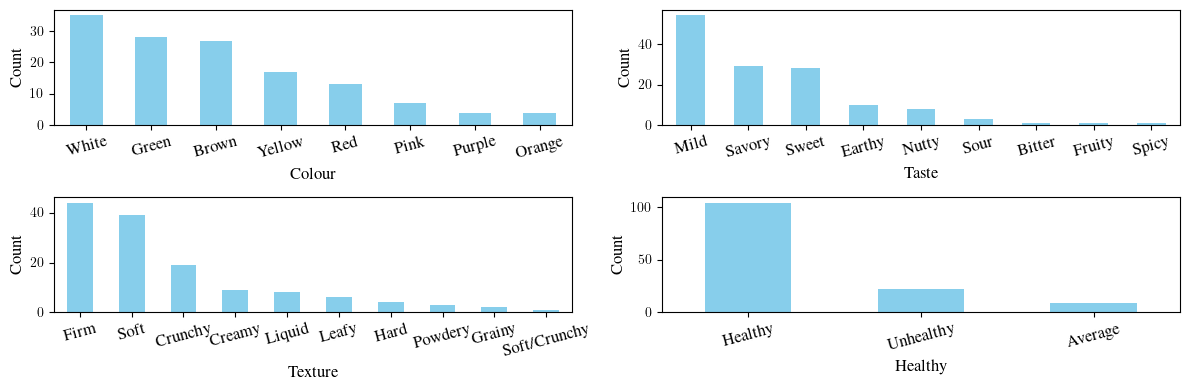

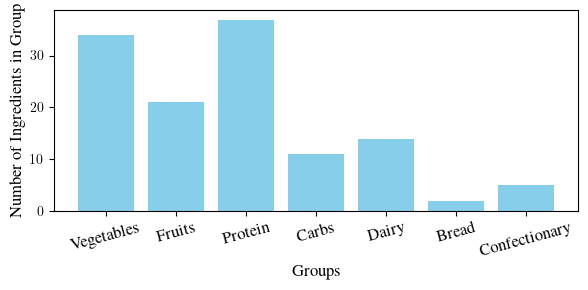

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_ingredient_data_histograms(ingredient_df, rotation=15, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(ingredient_df)

    # Plotting histograms for each feature
    features = ['Colour', 'Taste', 'Texture', 'Healthy']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()

    # Count the number of 1s in specified groups
    groups = ['Group A veg', 'Group A fruit', 'Group BC', 'Group D', 'Group E', 'Bread', 'Confectionary']
    
    group_rename = {
        'Group A veg': 'Vegetables',
        'Group A fruit': 'Fruits',
        'Group BC': 'Protein',
        'Group D': 'Carbs',
        'Group E': 'Dairy',
        'Bread': 'Bread',
        'Confectionary': 'Confectionary'
    }
    
    counts = {group: df[group].sum() for group in groups}

    # Rename the groups for the plot
    renamed_counts = {group_rename[group]: count for group, count in counts.items()}

    # Plot the counts on a bar chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.bar(renamed_counts.keys(), renamed_counts.values(), color='skyblue')
    ax.set_xlabel('Groups', fontsize=fontsize)
    ax.set_ylabel('Number of Ingredients in Group', fontsize=fontsize)
    plt.xticks(rotation=15, fontsize=fontsize)
    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
from utils.process_data import get_data
ingredient_df = get_data("data.csv")


plot_ingredient_data_histograms(ingredient_df)


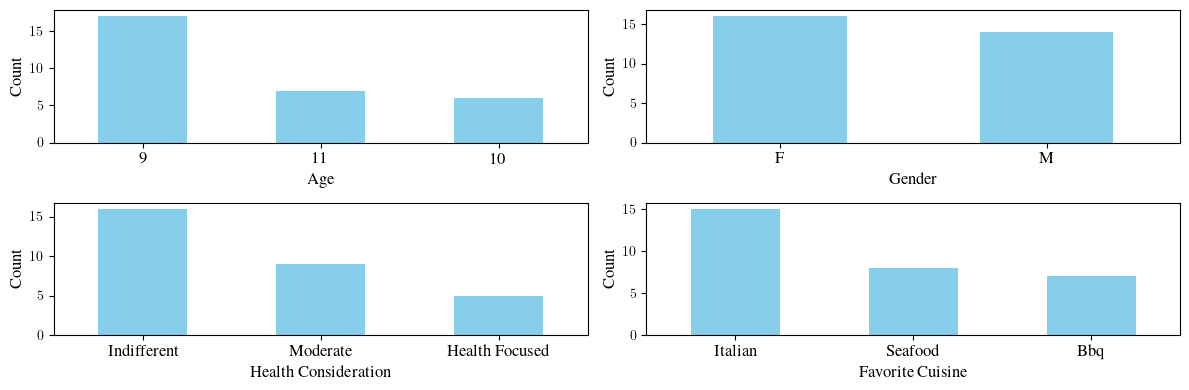

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

def plot_child_data_histograms(child_data, rotation=0, fontsize=12):
    # Convert child_data to a DataFrame
    df = pd.DataFrame(child_data).T

    # Plotting histograms for each feature
    features = ['age', 'gender', 'health_consideration', 'favorite_cuisine']

    fig, axes = plt.subplots(2, 2, figsize=(12, 4))
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if df[feature].dtype == 'object':
            # For categorical data
            df[feature].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
            axes[idx].set_ylabel('Count', fontsize=fontsize)
            # Format the x-tick labels
            formatted_labels = [label.replace('_', ' ').title() if isinstance(label, str) else label for label in df[feature].value_counts().index]
            axes[idx].set_xticklabels(formatted_labels, rotation=rotation, fontsize=fontsize)
        else:
            # For numerical data
            df[feature].plot(kind='hist', ax=axes[idx], bins=range(8, 13), color='skyblue')
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_xticks(range(8, 13))
            axes[idx].tick_params(axis='x', labelsize=fontsize)

        # Capitalize and remove underscores in the feature name for xlabel
        formatted_feature = feature.replace('_', ' ').title()
        # axes[idx].set_title(f'Histogram of {formatted_feature}', fontsize=fontsize)
        axes[idx].set_xlabel(formatted_feature, fontsize=fontsize)

    plt.tight_layout()
    plt.show()
# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    "text.latex.preamble": r"\usepackage{times}",
})

    
child_data = get_child_data()
plot_child_data_histograms(child_data)
